In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load images
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()
#prepare images for Keras
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [3]:
#convert images to float and normalise
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255


In [4]:
# use given spec to build net
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.5))
# need to flatten here to match shapes
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
epochs=20

In [7]:
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir="./logs") #might have a look with tb
with tensorflow.device('/cpu:0'): # my GPU installlation needs work
    history = model.fit(train_X, train_Y, batch_size=32, validation_split=0.2,epochs=epochs, callbacks=tensorboard_callback)

Epoch 1/20
   1/1500 [..............................] - ETA: 0s - loss: 2.2951 - accuracy: 0.1250WARNING:tensorflow:From /home/tony/.virtualenvs/TF2/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2067 - accuracy: 0.9339 - val_loss: 0.0660 - val_accuracy: 0.9796
Epoch 2/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0879 - accuracy: 0.9725 - val_loss: 0.0501 - val_accuracy: 0.9855
Epoch 3/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0709 - accuracy: 0.9768 - val_loss: 0.0454 - val_accuracy: 0.9861
Epoch 4/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 0.0408 - val_accuracy: 0.9888
Epoch 5/20
1500/1500 [=================

In [8]:
with tensorflow.device('/cpu:0'):
    model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0290 - accuracy: 0.9915


In [9]:
model.save('./model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model/assets


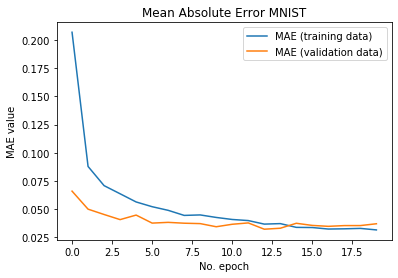

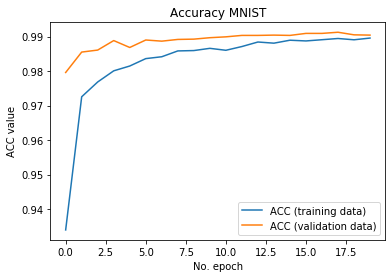

In [10]:
# Plot history: MAE: Mean Absolute Error
#xmarks=[i for i in range(1,epochs+1,1)]

fig = plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('Mean Absolute Error MNIST')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
#plt.xticks(xmarks)
plt.legend(loc="best")
plt.show()

# Plot history: ACC: Accuracy
plt.plot(history.history['accuracy'], label='ACC (training data)')
plt.plot(history.history['val_accuracy'], label='ACC (validation data)')
plt.title('Accuracy MNIST')
plt.ylabel('ACC value')
plt.xlabel('No. epoch')
#plt.xticks(xmarks)
plt.legend(loc="best")
plt.show()

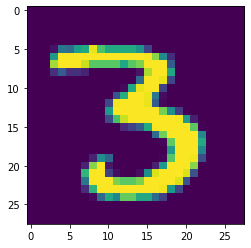

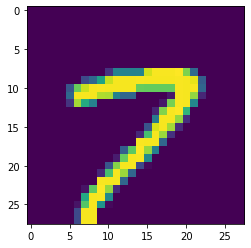

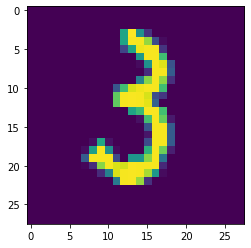

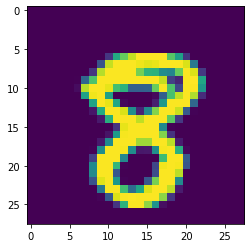

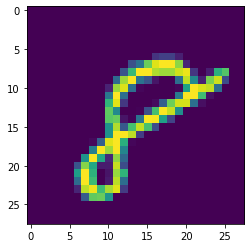

In [11]:
sample = [12, 123, 1234, 23456, 59999]
predict = []
# Generate plots for samples
for smpl in sample:
  # Plot
  im = train_X[smpl].reshape((28, 28))
  plt.imshow(im)
  plt.show()
  # put sample in array for prediction
  predict.append(train_X[smpl]) 

In [13]:
# use model to check predictions
predict = np.array(predict)
with tensorflow.device('/cpu:0'):
    predictions = model.predict(predict)
digits = np.argmax(predictions, axis = 1)
print(digits)

[3 7 3 8 8]
